In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='ticks', palette='Set2')

stats_path = "/fsx/xwhan/data/gov_report/dev_source_stats"

stories_stats_path = '/fsx/xwhan/data/pretrain_corpus/STORIES/062419/lens.npy'
mediasum_stats_path = '/fsx/xwhan/data/pretrain_corpus/dialogue/mediasum/valid.stats'
opensub_stats_path = '/fsx/xwhan/data/pretrain_corpus/dialogue/opensub/valid.stats'
books3_stats_path = '/fsx/xwhan/data/pretrain_corpus/books3/raw/valid_stats'
realnews_stats_path = '/fsx/xwhan/data/pretrain_corpus/realnews/valid_stats'
c4_stats_path = '/fsx/xwhan/data/pretrain_corpus/c4/bpe/valid_stats'

def read_lens_from_awk(file):
    words_per_line = [int(line.strip()) for line in open(file).readlines()]
    doc_lens = []
    curr_len = 0
    for _ in words_per_line:
        if _ != 0:
            curr_len += _
        else:
            if curr_len != 0: doc_lens.append(curr_len)
            curr_len = 0
    if curr_len != 0:
        doc_lens.append(curr_len)
    return doc_lens

books_wc = read_lens_from_awk(books3_stats_path)
realnews_wc = read_lens_from_awk(realnews_stats_path)
opensub_wc = read_lens_from_awk(opensub_stats_path)
mediasum_wc = read_lens_from_awk(mediasum_stats_path)
c4_wc = read_lens_from_awk(c4_stats_path)
stories_wc = np.load(stories_stats_path)

print(len(books_wc))
print(len(realnews_wc))
print(len(opensub_wc))
print(len(mediasum_wc))
print(len(c4_wc))
print(len(stories_wc))


# plt.violinplot([books_wc[:1000]], widths=2, showmeans=False, showmedians=False, showextrema=False)
# plt.show()

19526
411662
73
3000
10665
5000


(100, 3)


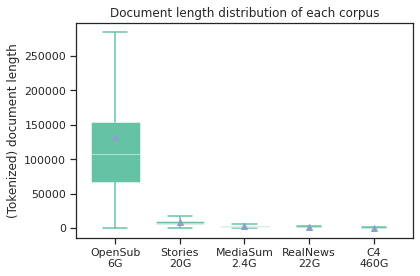

In [32]:
np.random.seed(10)
D = np.random.normal((3, 5, 4), (1.25, 1.00, 1.25), (100, 3))
print(D.shape)

# print(sum(np.array(books_wc) == 0))
plt.boxplot([books_wc,  stories_wc, mediasum_wc, realnews_wc[:10000], c4_wc] ,positions=np.array([2, 4, 6, 8, 10]) + 1,  widths=1.5, patch_artist=True,
                showmeans=True, showfliers=False,
                medianprops={"color": "white", "linewidth": 0.5},
                boxprops={"facecolor": "C0", "edgecolor": "white",
                          "linewidth": 0.5},
                whiskerprops={"color": "C0", "linewidth": 1.5},
                capprops={"color": "C0", "linewidth": 1.5}, labels=['OpenSub\n6G', 'Stories\n20G', 'MediaSum\n2.4G', 'RealNews\n22G', 'C4\n460G'])

# plt.ylim((0,10000))
plt.ylabel('(Tokenized) document length')
plt.title('Document length distribution of each corpus')
plt.tight_layout()
plt.savefig('lens.pdf')
plt.show()
